# Static Charts with Python

In [1]:
import pandas as pd

# Import of Data
df = pd.read_csv("NRW2019_Bundeslaender.csv")
# https://kite.com/python/answers/how-to-sum-two-columns-in-a-pandas-dataframe-in-python
df = df.set_index('Bundesland') 
df

,ÖVP,SPÖ,FPÖ,NEOS,JETZT,GRÜNE,SONST.
Bundesland,,,,,,,
Burgenland,38.26,29.38,17.35,4.88,1.26,8.08,0.80
Kärnten,34.90,26.16,19.78,6.80,1.67,9.51,1.18
Niederösterreich,42.32,19.92,16.41,7.67,1.73,10.96,0.99
Oberösterreich,36.75,22.15,17.50,7.32,1.47,13.72,1.08
Salzburg,46.38,16.36,13.69,8.43,1.43,12.61,1.10
Steiermark,38.90,19.23,18.46,7.10,1.70,12.98,1.64
Tirol,45.81,13.02,14.69,8.86,1.74,14.71,1.17
Vorarlberg,36.62,13.14,14.71,13.56,2.13,18.14,1.70
Wien,24.63,27.11,12.83,9.86,2.96,20.69,1.91


In [2]:
from matplotlib.colors import LinearSegmentedColormap

# Color Schema
colors = ['#63C3D0', '#ce000c', '#0056A2', '#E3257B', '#ADADAD', '#88B626', '#333333']
cm = LinearSegmentedColormap.from_list('austrianParties', colors, N=7)

## Grouped bar charts, grouped by parties or states 
The following grouped bar chart shows how many percent each party got on the y -axis organized by state. For the color schema the official party colors are used. 
It is interesting to see that the ÖVP has much better results in rural areas than in the capital. Vienna is also the only state where the ÖVP did not get the majority of the votes.

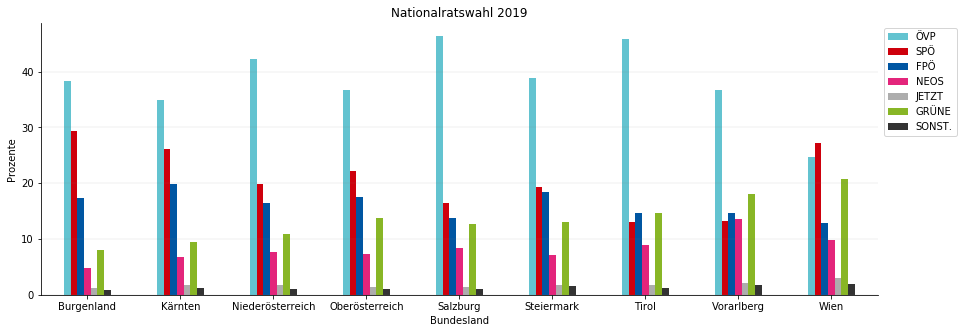

In [3]:
plt = df.plot(kind='bar', color = colors, title = "Nationalratswahl 2019", figsize=(15,5), rot=0)

# Label Axis
plt.set_xlabel("Bundesland")
plt.set_ylabel("Prozente")

# Removing top and right borders
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)

# Adds major gridlines
plt.grid(color='grey', linestyle='-', axis='y', linewidth=0.25, alpha=0.5)

plot1 = plt.legend(bbox_to_anchor=(1.1, 1))

## Pie charts for each state
The following pie charts show the results of each election by state. As there is an uneven amount of states in Austria the last empty space is used for the legend. For the color schema the official party colors are used. Each segment corresponds to the percentage of the votes a party got. As it is more difficult to compare the different sizes to each other the values are added to each segment. Pie charts are good to figure out if parties have more than half of the votes together. In the graphic below you can see easily that the ÖVP and the SPÖ have the mayority of the votes in all states but in Vorarlberg.

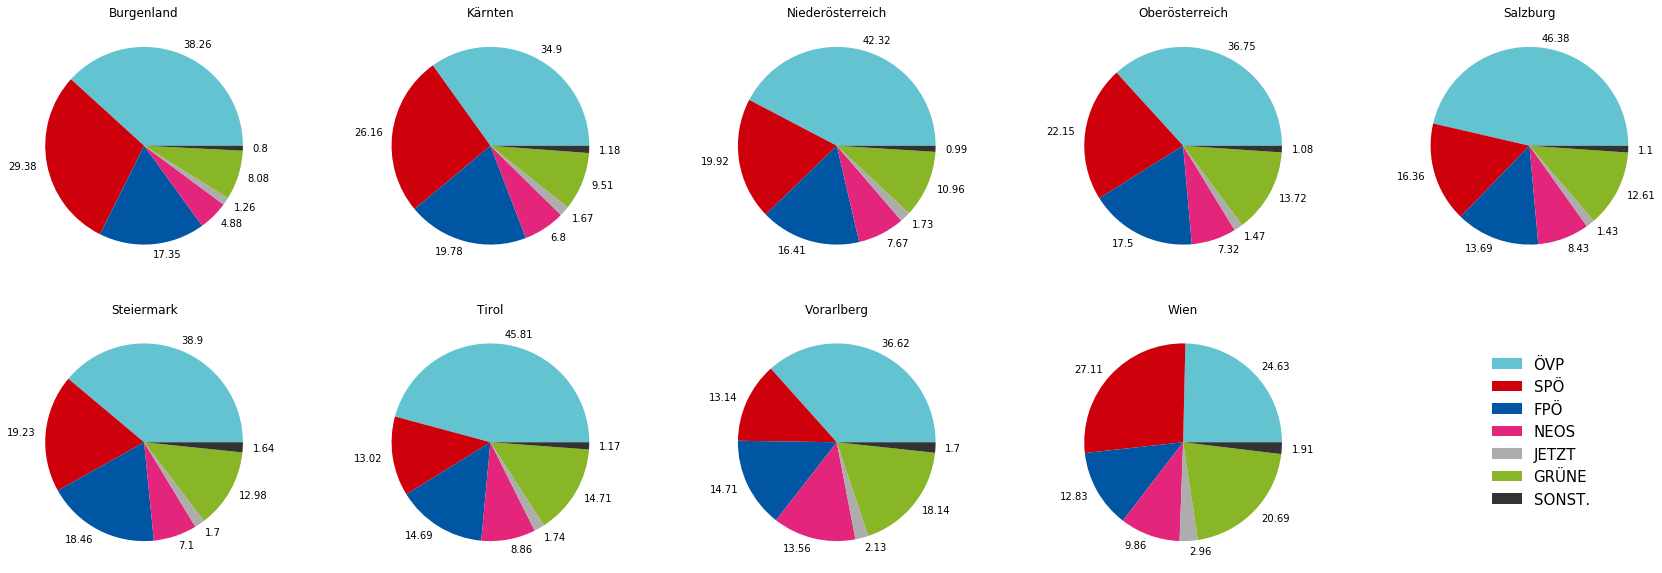

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30,10))
for ax, col in zip(axes.flat, df.T.columns):
    ax.pie(df.T[col], labels=df.T[col], colors=colors) 
    ax.set(ylabel='', title=col, aspect='equal')
    
axes.flat[-2].legend(df.columns, bbox_to_anchor=(2.2, .9), prop={'size': 15}, frameon=False)    
axes.flat[-1].set_visible(False) # to remove last plot
